In [1]:
import site
site.getsitepackages()

['/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import pickle
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
pd.options.mode.chained_assignment = None

In [3]:
data = pd.read_csv("data/term-deposit-marketing-2020.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [4]:
##we have a large amount of data, enough to justify using 20 percent of the data as a test data set in addition to the testing
##done during the k-cross validation 
train_data, test_data = train_test_split(data.to_numpy(), random_state=5, test_size=.2)
test_data = pd.DataFrame(test_data, columns=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'target'])
train_data = pd.DataFrame(train_data, columns=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'target'])
train_y = train_data.copy().drop(columns=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign'], axis=1)
train_x = train_data.copy().drop(columns=['target'], axis=1)
test_x = test_data.copy().drop(columns=['target'], axis=1)
test_y = test_data.copy().drop(columns=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign'], axis=1)

In [5]:
##y is the target. has the client subscribed to a term deposit?(binary)
##default = has credit default(binary)
##housing = has a housing loan(binary)
##balance = average yearly balance(numeric)
##day = day of the month in which the last contact was made(numeric)
##loan = has a personal loan(binary)
##contact = communication type(categorical)
##month = month of the year in which the last contact was made(categorical(months))
##duration = duration of the call(numeric)
##campaign = number of contacts performed during this campaign and for this client (numeric, includes last contact)

#much of the data is categorical and unranked(with the exception of education).
#1. split the data into training and test data
#2. perform analyses on the categorical data
#   a. look into how many categories
#   b. can categories be compressed?
#   c. consider shuffling the data as it appears organized by date.
#.  d. data appears to have an imbalance of targets. 

In [6]:
##check categorical data, view the categories and look at the balance


<AxesSubplot:>

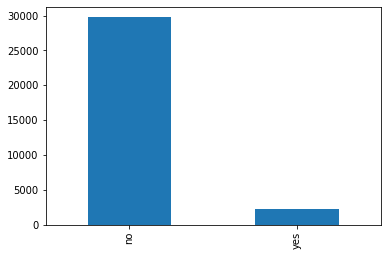

In [7]:
train_y['target'].value_counts().plot(kind="bar")
#data is imbalanced 


<AxesSubplot:ylabel='Frequency'>

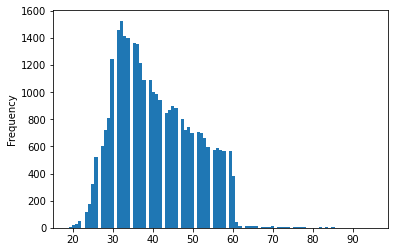

In [8]:
bins=max(train_x['age'])
train_x['age'].plot.hist(bins=bins)
##the graph below shows the ages of the dataset, we can see the most common ages is 32, with a negative-skew

<AxesSubplot:>

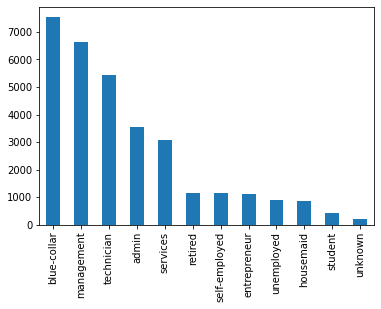

In [9]:
train_x['job'].value_counts().plot(kind='bar')
##below shows the recorded jobs and their frequency. many of these categories can be compressed.
##housemaid-> services
##self-employed ->entrepreneur
##student->unemployed
##admin -> management
##unknown data can be either dropped, predicted, or integrated into the most frequent category

<AxesSubplot:>

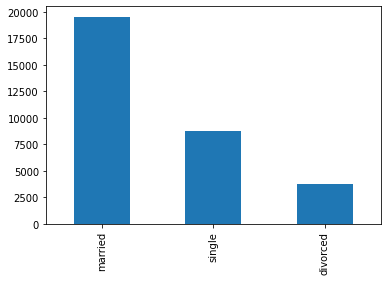

In [10]:
train_x['marital'].value_counts().plot(kind='bar')
##the below graph shows the marriage rates of the data, single and divorced could potentially be combined into one category
##apply a binary approach and created a new variable "is_married" which is binary. Can also apply weighted ordinal rankings

<AxesSubplot:>

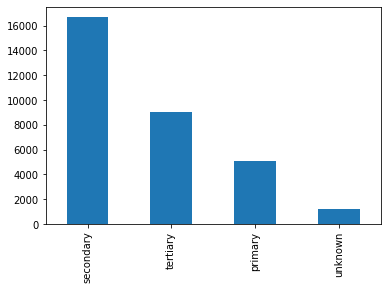

In [11]:
train_x['education'].value_counts().plot(kind='bar')
##unknown data can be dropped or integrated into the categories. can apply ordinal encoding

<AxesSubplot:>

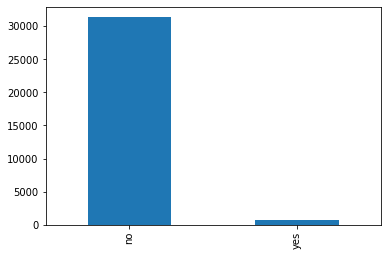

In [12]:
train_x['default'].value_counts().plot(kind='bar')
##below shows the binary data for if the client has a credit default

<AxesSubplot:ylabel='Frequency'>

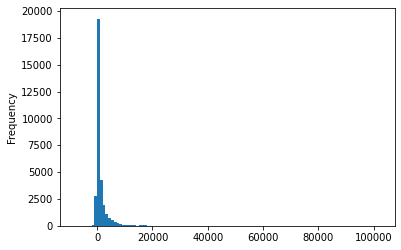

In [13]:
bins = round((max(train_x['balance']) - min(train_x['balance']))/1000)
train_x['balance'].plot.hist(bins=bins)
##below shows the average balance of each observations account

<AxesSubplot:>

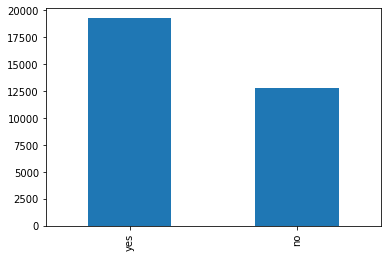

In [14]:
train_x['housing'].value_counts().plot(kind='bar')
##below shows the binary data for if the client has a housing loan

<AxesSubplot:>

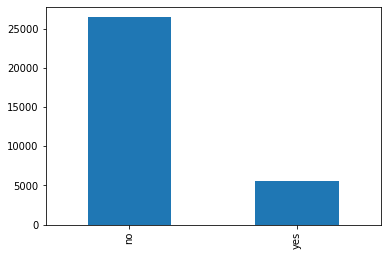

In [15]:
train_x['loan'].value_counts().plot(kind='bar')
##below shows the amount of people that have a personal loan

<AxesSubplot:>

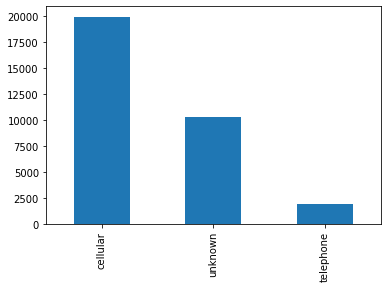

In [16]:
train_x['contact'].value_counts().plot(kind='bar')
##below shows the data for the contact type
##could eliminate or integrate unknown and make this a binary field

<AxesSubplot:ylabel='Frequency'>

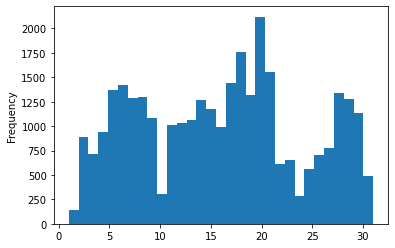

In [17]:
bins = max(train_x['day'])
train_x['day'].plot.hist(bins=bins)
##below shows the days that users were contacted, this data can be interpreted for weekends, 
##start or end of the month(pay day)


<AxesSubplot:>

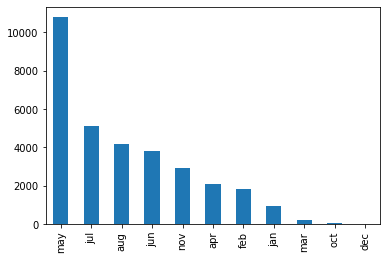

In [18]:
train_x['month'].value_counts().plot(kind='bar')
##below shows the month that an observation was contac

<AxesSubplot:ylabel='Frequency'>

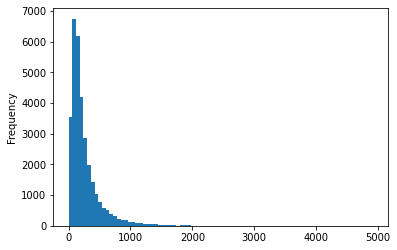

In [19]:
bins = round(max(train_x['duration'])/60)
train_x['duration'].plot.hist(bins=bins)
##below shows the duration of the phone call, the vast majority of phone calls were under 10 minutes
##peaking around the 2-3 minute mark

63


<AxesSubplot:ylabel='Frequency'>

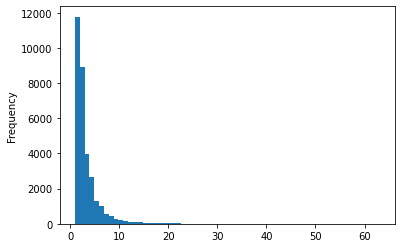

In [20]:
bins = round(max(train_x['campaign']))
print(bins)
train_x['campaign'].plot.hist(bins=bins)
##below shows the amount of contacts that had been made to a client in a campaign

In [21]:
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [22]:
##converts all of housing, default and loan features to a binary format to be interpreted by the model
def convert_features_to_binary(input_df):
    input_df.housing = input_df.housing.map(dict(yes=1, no=0))
    input_df.default = input_df.default.map(dict(yes=1, no=0))
    input_df.loan = input_df.loan.map(dict(yes=1, no=0))
  

##converts target variables to binary for training
def convert_target_to_binary(input_df):
    input_df.target = input_df.target.map(dict(yes=1, no=0))
    
##converts contact column into a binary format, creates a new column called is_cellular. 
##unknown variables were called cellular variables due to cellular being the mode category
def convert_unknown_contact(input_df):
    input_df['is_cellular'] = input_df.contact.map(dict(unknown=1, cellular=1, telephone=0))
    input_df = input_df.drop(columns=['contact'], axis=1, inplace=True)

    
##converts marital status into a binary format. Divorced was called single as in the context of a loan, a divorced person
##has a single income and many of the same financial features as a single person
##a new column was created called is_married which is binary
def convert_marital_status(input_df):
    input_df['is_married'] = input_df.marital.map(dict(divorced=0, single=0, married=1))
    input_df = input_df.drop(columns=['marital'], axis=1, inplace=True)

##converts the education of an observation to an ordinal rank, 0 for primary, 1 for secondary, 2 for tertiary.
def convert_education_ordinally(input_df):
    input_df.education = input_df.education.map(dict(unknown='secondary', 
                                                     secondary='secondary', 
                                                     primary='primary', 
                                                     tertiary='tertiary'))
    education = [['primary', 'secondary', 'tertiary']]
    enc = OrdinalEncoder(categories=education)
    enc.fit(input_df[['education']])
    input_df['education'] = enc.transform(input_df[['education']])


#encodes the jobs column using one hot encoding. Combines similiar jobs to reduce dimensionality
def encode_job(input_df):
    input_df['job'] = input_df['job'].replace({'blue-collar': 'blue_collar', 'self-employed': 'self_employed'})
    input_df.job = input_df.job.map(dict(unknown='blue-collar', 
                                         student='unemployed', 
                                         housemaid='services',
                                         unemployed='unemployed',
                                         entrepreneur='self-employed',
                                         self_employed='self-employed',
                                         retired='retired',
                                         services='services',
                                         admin='admin',
                                         technician='services',
                                         management='management',
                                         blue_collar='blue-collar'))
    enc = OneHotEncoder(handle_unknown='ignore')
    encoder_df = pd.DataFrame(enc.fit_transform(input_df[['job']]).toarray())
    input_df.drop('job', axis=1, inplace=True)
    input_df['is_admin'] = encoder_df[0]
    input_df['is_bluecollar'] = encoder_df[1]
    input_df['is_management'] = encoder_df[2]
    input_df['is_self_employed'] = encoder_df[4]
    input_df['is_services'] = encoder_df[5]
    input_df['is_unemployed'] = encoder_df[6]

    
##pipeline function to clean all the data at once
def clean_data(x_train_df, y_train_df):
    convert_features_to_binary(x_train_df)
    convert_target_to_binary(y_train_df)
    convert_unknown_contact(x_train_df)
    convert_marital_status(x_train_df)
    convert_education_ordinally(x_train_df)
    encode_job(x_train_df)
    x_train_df.drop('month', axis=1, inplace=True)
    



In [23]:
##data must be standardized, due to all data values being positive, 
##it would be best to standardize the values between 0 and 1 to avoid the introduction of negative numbers.
#TestData = data.copy()
from sklearn.preprocessing import MinMaxScaler
#clean_data(TestData, TestData)
#scaler = MinMaxScaler()
#scaler.fit(TestData)
#scaledData = scaler.transform(TestData)


In [24]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import BaggingClassifier
##from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import AdaBoostClassifier

In [25]:
#undersample = RandomUnderSampler(sampling_strategy='majority')
#TestData = data.copy()
#y_train = TestData[['y']]
#x_train = TestData.drop('y', axis=1)
#clean_data(x_train, y_train)
#X, y = undersample.fit_resample(x_train, y_train)
#y['y'].value_counts().plot(kind="bar")


In [26]:
k_fold = StratifiedKFold(n_splits=5, shuffle=True)
averages_list = []
for train_index, test_index in k_fold.split(train_x, train_y):
    x_train_fold, x_test_fold = train_x.loc[train_index,:], train_x.loc[test_index,:]
    y_train_fold, y_test_fold = train_y.loc[train_index,:], train_y.loc[test_index,:]
    
    x_train_fold = x_train_fold.reset_index().drop(columns=['index'], axis=1)
    y_train_fold = y_train_fold.reset_index().drop(columns=['index'], axis=1)
    x_test_fold = x_test_fold.reset_index().drop(columns=['index'], axis=1)
    y_test_fold = y_test_fold.reset_index().drop(columns=['index'], axis=1)
    
    clean_data(x_train_fold, y_train_fold)
    clean_data(x_test_fold, y_test_fold)

    scaler = MinMaxScaler()
    scaler.fit(x_train_fold)
    scaled_x_train_data = scaler.transform(x_train_fold)
    scaled_x_test_data = scaler.transform(x_test_fold)
    
    Oversample = RandomOverSampler(random_state=42)
    X, y = Oversample.fit_resample(scaled_x_train_data, y_train_fold.to_numpy())
    model = BaggingClassifier(tree.DecisionTreeClassifier())
    model.fit(X,y.ravel())
    averages_list.append(model.score(scaled_x_test_data, y_test_fold))
    
    print(model.score(scaled_x_test_data, y_test_fold))

0.92421875
0.92578125
0.915625
0.92171875
0.91859375


In [27]:
##accuracy of this model is the average of the accuracies of the K-fold scores
##92% accuracy
accuracy = sum(averages_list)/len(averages_list)
accuracy

0.9211875

In [28]:
clean_data(test_x, test_y)
scaled_x_test_data = scaler.transform(test_x)


In [29]:
test_x
df = pd.DataFrame(scaled_x_test_data, columns=['age', 'education', 'default', 'balance', 'housing', 'loan', 'day', 'duration', 'campaign', 'is_cellular', 'is_married', 'is_admin', 'is_bluecollar', 'is_management', 'is_self_employed', 'is_services', 'is_unemployed'])

In [30]:
df['target'] = test_y['target']
df

,age,education,default,balance,housing,loan,day,duration,campaign,is_cellular,is_married,is_admin,is_bluecollar,is_management,is_self_employed,is_services,is_unemployed,target
0,0.315789,1.0,0.0,0.072876,0.0,0.0,0.333333,0.018918,0.052632,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,0.210526,1.0,0.0,0.078550,1.0,1.0,0.033333,0.015053,0.035088,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,0.131579,0.5,0.0,0.072803,1.0,0.0,0.700000,0.081570,0.105263,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,0.171053,0.5,0.0,0.073684,1.0,0.0,0.566667,0.033157,0.017544,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0
4,0.236842,0.5,0.0,0.074755,1.0,0.0,0.166667,0.012002,0.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.184211,1.0,0.0,0.075300,0.0,0.0,0.566667,0.070382,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
7996,0.210526,0.5,0.0,0.073947,0.0,0.0,0.700000,0.022376,0.017544,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
7997,0.223684,1.0,0.0,0.076471,0.0,0.0,0.533333,0.012408,0.017544,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
7998,0.144737,0.5,1.0,0.071451,1.0,1.0,0.366667,0.032954,0.035088,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


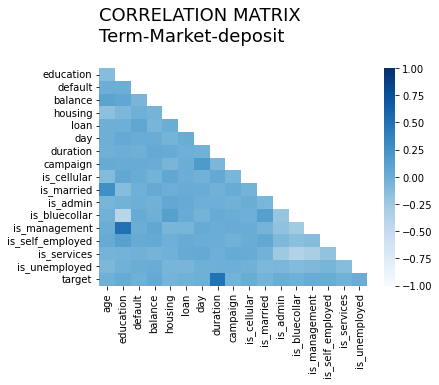

In [31]:
df_corr = df.corr()
np.ones_like(df_corr, dtype=bool)
mask = np.triu(np.ones_like(df_corr, dtype=bool))
mask = mask[1:, :-1]
corr = df_corr.iloc[1:, :-1].copy()
# title
title = 'CORRELATION MATRIX\nTerm-Market-deposit\n'
plt.title(title, loc='left', fontsize=18)
sb.heatmap(corr, mask=mask, fmt=".2f", cmap='Blues',
               vmin=-1, vmax=1)
# yticks
plt.yticks(rotation=0)
plt.show()


In [32]:
##We can see that the most important factor is the duration of the call. with a very large correlation between
##that and the target variable. This is understandable as when a customer is on the phone for a longer time, they
##are more likely to be engaged in a discussion that will bring forth a term deposit. Other factors seem to be loosley correlated with the overall results


In [33]:
print(model.score(scaled_x_test_data, test_y))
##as shown below the model performs approximately as well on data that is has not seen, scoring 92 percent accuracy.

0.92225


In [34]:
results = model.predict(scaled_x_test_data)
confusion_matrix(test_y, results)


array([[7161,  213],
       [ 409,  217]])